<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


#데이터 가져오기

In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
region_old_g = pd.read_csv('/content/drive/MyDrive/elderly people classification/지역별 독거노인들.csv')
new_alone = pd.read_csv('/content/drive/MyDrive/elderly people classification/독거노인총질병수.csv', encoding='cp949')


In [6]:
drinks = ['BD1_11', 'BD2_1', 'BD2_31', 'dr_month']
stress = ['D_1_1','BP6_10', 'BP7', 'mh_stress']
smoke =['BS3_1']

In [7]:
disease = ['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

#흡연_음주, 질병과의 상관관계

담배랑 음주랑 관련성 있음

### 총 질병이 1개 이상인 경우와 상관관계 찾기

In [8]:
new_alone = new_alone[new_alone['총질병수']>0]

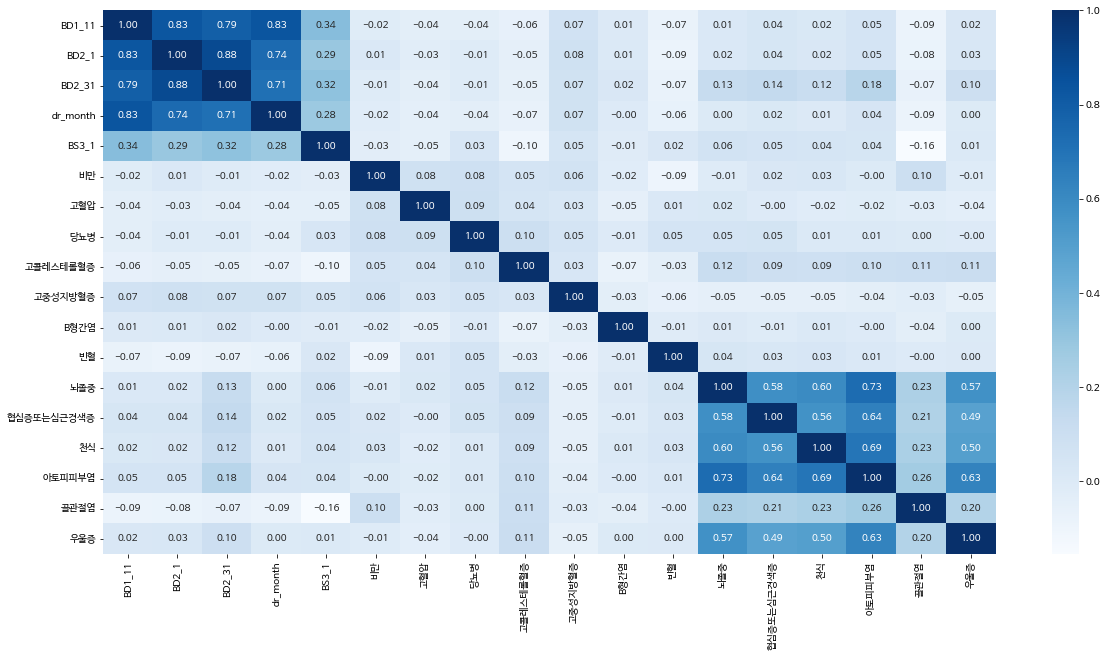

In [9]:
df = pd.concat([new_alone[drinks],new_alone[smoke],new_alone[disease]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

폭음 빈도와 뇌졸중, 협심증, 천식, 아토피피부염 관련

#주관적 건강인지와 질병간의 상관관계

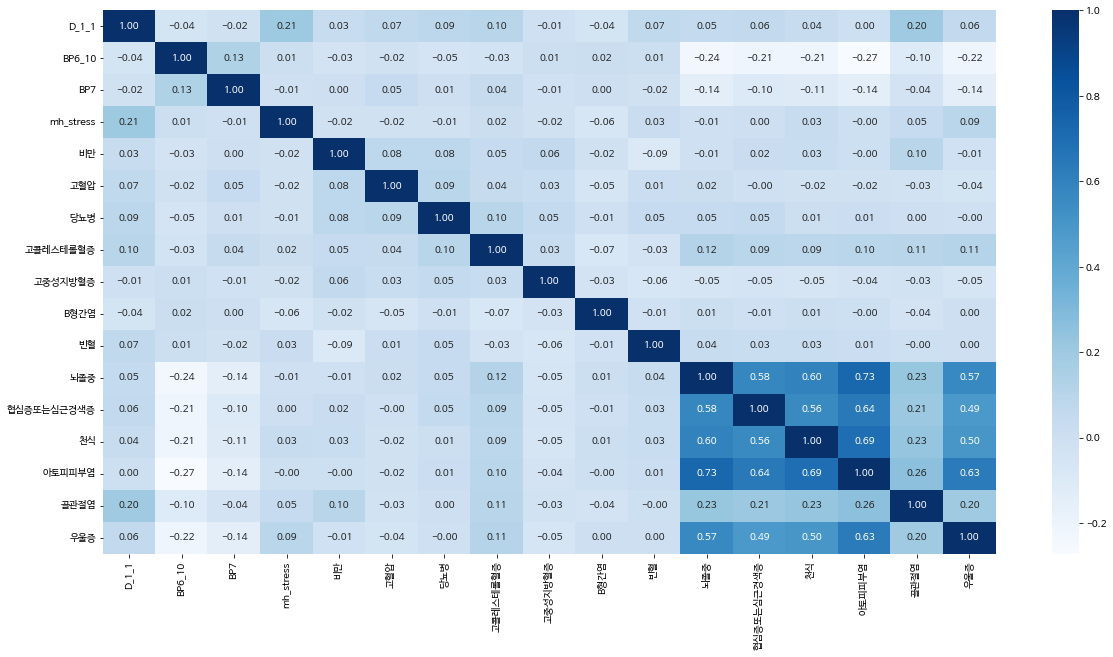

In [10]:
df = pd.concat([new_alone[stress],new_alone[disease]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

주관적건강인지랑 골관절염 상관관계 : 약           
질병과 1년간 자살생각여부와 관계 매우 없음

#소득분위랑 건강보험, 경제활동, 근로 관계

In [11]:
income = ['incm', 'ho_incm', 'incm5', 'ho_incm5']
tins = ['tins']
work = ['EC1_1', 'EC_wht_23', 'EC_wht_5']

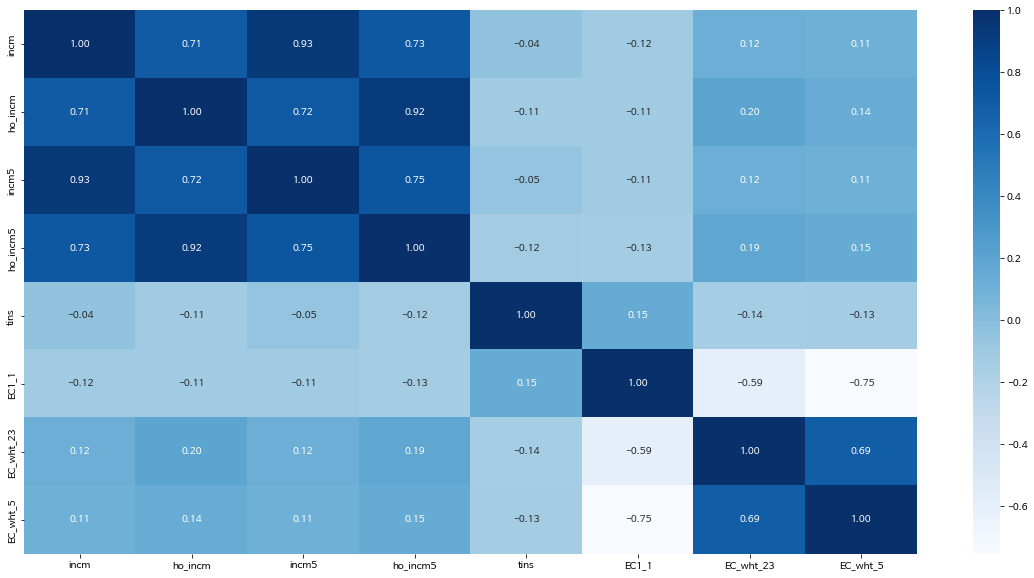

In [12]:
df = pd.concat([region_old_g[income], region_old_g[tins], region_old_g[work]], axis = 1)
df = df.corr()

plt.figure(figsize = (20, 10))
sns.heatmap(df, annot=True, fmt = '.2f', cmap = 'Blues')

경제활동과 건강보험종류 관계: 약

#교육수준, 결혼여부, 운동여부 간의 상관관계(나머지)

###교육수준과 질병간의 관계

#영양소와 질병들의 상관관계

In [13]:
nutrition = ['N_INTK',
'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC']

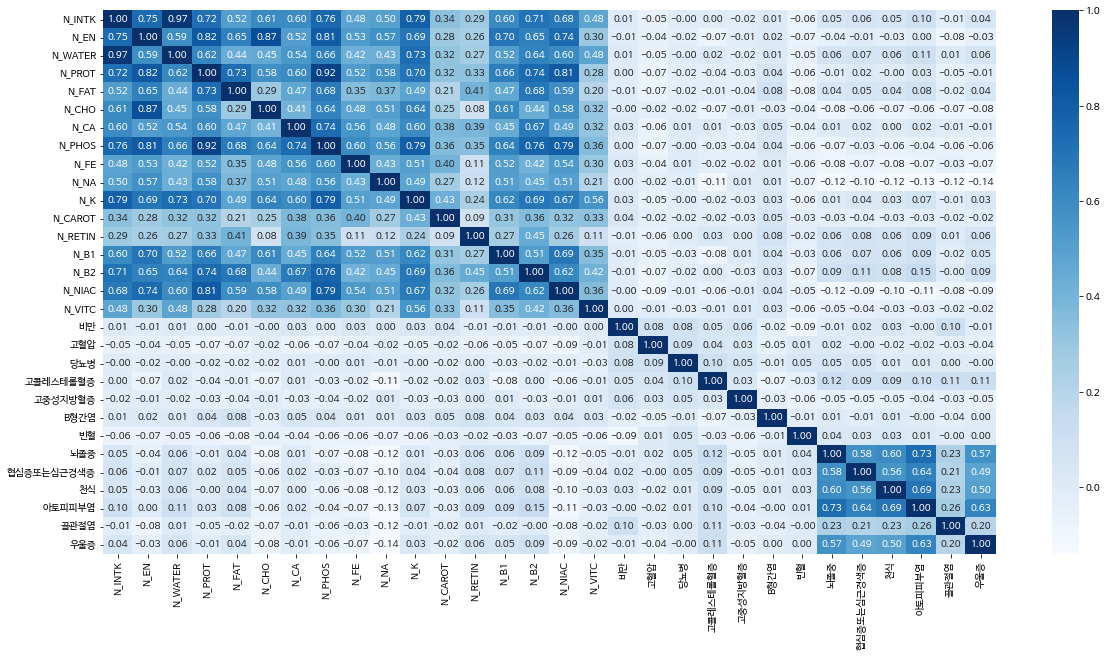

In [14]:
df = pd.concat([new_alone[nutrition],new_alone[disease]], axis=1)
df = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

In [15]:
region_old_g.columns.tolist()

['Unnamed: 0',
 'ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',

#독거노인_소득분위, 스트레스, 주관적건강인지, 총질병수

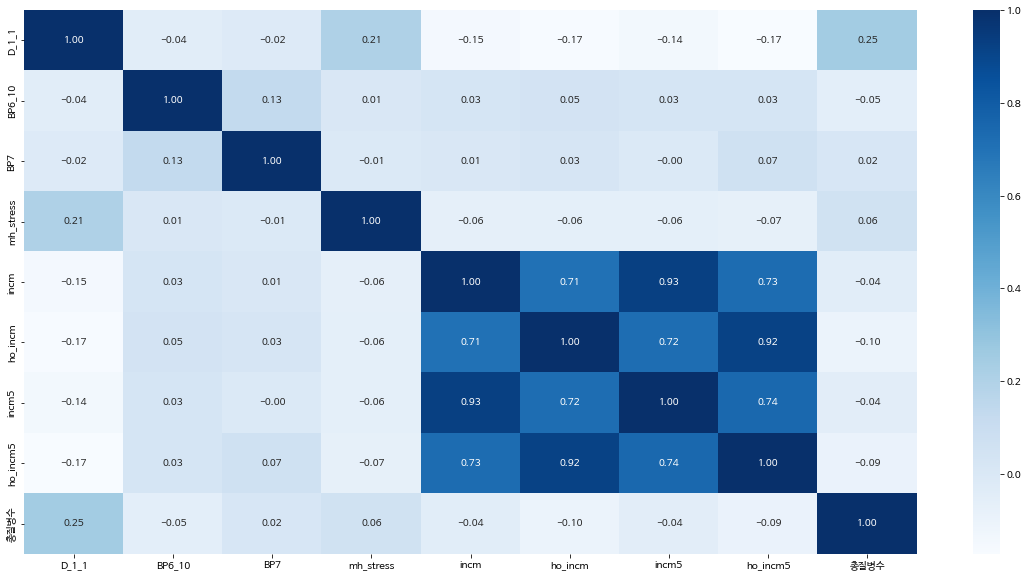

In [16]:
df = pd.concat([new_alone[stress],new_alone[income], new_alone["총질병수"]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')